<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preprocessing</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [12]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [13]:
all_data = pd.concat((df_train.drop(['Id','SalePrice'],axis=1),df_test.drop('Id',axis=1)))

# Data Preprocessing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023FC47D7B00>,
      dtype=object)

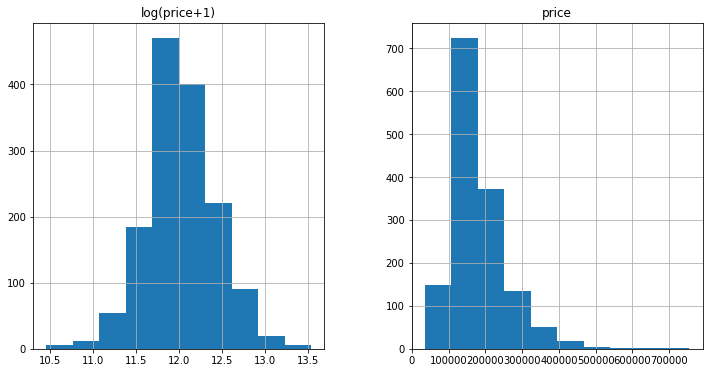

In [14]:
matplotlib.rcParams['figure.figsize'] = (12.0,6.0)
prices = pd.DataFrame({'price':df_train['SalePrice'], 'log(price+1)':np.log1p(df_train['SalePrice'])})
prices.hist()

In [15]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index

skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > .75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

C:\Users\thwhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log1p
  if __name__ == '__main__':


In [18]:
all_data = pd.get_dummies(all_data)

In [19]:
all_data = all_data.fillna(all_data.mean())

In [22]:
X_train = all_data[:df_train.shape[0]]
X_test = all_data[df_train.shape[0]:]
y= df_train['SalePrice']

In [23]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [25]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring = 'neg_mean_squared_error',cv=5))
    return(rmse)

In [24]:
model_ridge = Ridge()

In [37]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = RidgeCV(alphas=alphas).fit(X_train,y)

In [40]:
coef = pd.Series(cv_ridge.coef_, index=X_train.columns)
coef.sort_values()

MSZoning_C (all)        -0.146370
RoofMatl_ClyTile        -0.105209
Condition2_PosN         -0.080111
Neighborhood_Edwards    -0.077544
Functional_Maj2         -0.060619
Neighborhood_IDOTRR     -0.051978
PoolQC_Gd               -0.050590
Heating_Grav            -0.047237
Neighborhood_MeadowV    -0.047162
Neighborhood_Mitchel    -0.046538
Condition1_RRAe         -0.044330
SaleCondition_Abnorml   -0.040530
Neighborhood_NWAmes     -0.040054
LotShape_IR3            -0.038522
SaleType_WD             -0.038390
Neighborhood_OldTown    -0.036261
LandContour_Bnk         -0.034400
KitchenAbvGr            -0.033809
BsmtQual_TA             -0.031749
BsmtFinType2_BLQ        -0.030545
GarageCond_Fa           -0.030511
Exterior1st_Wd Sdng     -0.030166
Neighborhood_Gilbert    -0.029334
GarageQual_Fa           -0.029150
Foundation_BrkTil       -0.029123
BsmtExposure_No         -0.028011
BsmtCond_Fa             -0.027645
SaleType_COD            -0.027419
LotConfig_FR2           -0.027400
BsmtFinType1_L

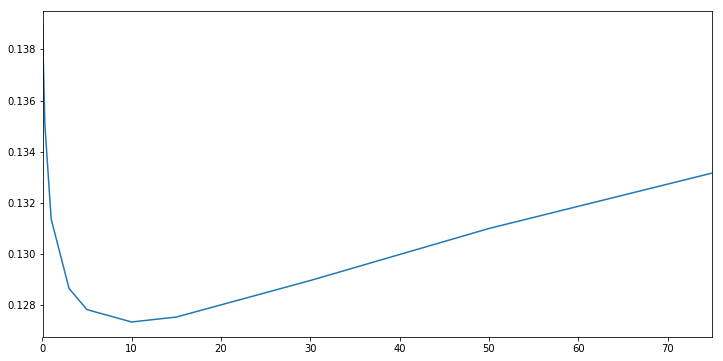

In [32]:
cv_ridge2 = pd.Series(cv_ridge, index=alphas)
cv_ridge2.plot()

In [31]:
coef = pd.Series(cv_ridge[6].coef_, index=X_train.columns)

AttributeError: 'numpy.float64' object has no attribute 'coef_'